In [9]:
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [10]:
DIRECTORY = 'flowers/'
Categories = ['rose', 'sunflower']

IMAGE_SIZE = 150

data = []

for category in Categories:
    folder = os.path.join(DIRECTORY, category)
    label = Categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(IMAGE_SIZE, IMAGE_SIZE))
        data.append([img_arr,label])

random.shuffle(data)

# total_images = []
# total_labels = []

train_images = []
train_labels = []

for features, labels in data:
    train_images.append(features)
    train_labels.append(labels)
    # total_images.append(features)
    # total_labels.append(labels)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

train_images = train_images/255

print(train_images.shape , train_labels.shape)

(1800, 150, 150, 3) (1800,)


In [11]:
TEST_DIRECTORY = 'test-flowers/'
Categories = ['rose', 'sunflower']

IMAGE_SIZE = 150
test_data = []

for category in Categories:
    folder = os.path.join(TEST_DIRECTORY, category)
    label = Categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(IMAGE_SIZE, IMAGE_SIZE))
        test_data.append([img_arr,label])

random.shuffle(test_data)

test_images = []
test_labels = []

for features, labels in test_data:
    test_images.append(features)
    test_labels.append(labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images = test_images/255

print(test_images.shape , test_labels.shape)

(600, 150, 150, 3) (600,)


In [12]:
# (trainX, testX, trainY, testY) = train_test_split(total_images, total_labels, test_size=0.2, random_state=42)
# trainX = np.array(trainX)
# trainX = trainX/255
# trainY = np.array(trainY)
# testX = np.array(testX)
# testX = testX/255
# testY = np.array(testY)

In [13]:
NAME = f'flower-prediction-{int(time.time())}'
tens_board = TensorBoard(log_dir=f'logs\\{NAME}\\')

# MODEL 1

In [17]:
#Model on CNN Architecture
model1 = Sequential()

model1.add(Conv2D(64,(3,3), activation= 'relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Conv2D(64,(3,3), activation= 'relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())

model1.add(Dense(128,input_shape = train_images.shape[1:], activation='relu'))
model1.add(Dense(2,activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_images,train_labels, epochs= 10, validation_split= 0.25, batch_size= 32, callbacks=[tens_board])


Epoch 1/10
43/43 [==============================] - 47s 1s/step - loss: 0.7236 - accuracy: 0.7689 - val_loss: 0.2958 - val_accuracy: 0.8556
Epoch 2/10
43/43 [==============================] - 46s 1s/step - loss: 0.2454 - accuracy: 0.9074 - val_loss: 0.2623 - val_accuracy: 0.9111
Epoch 3/10
43/43 [==============================] - 44s 1s/step - loss: 0.1784 - accuracy: 0.9333 - val_loss: 0.2218 - val_accuracy: 0.9222
Epoch 4/10
43/43 [==============================] - 44s 1s/step - loss: 0.1523 - accuracy: 0.9444 - val_loss: 0.2355 - val_accuracy: 0.9200
Epoch 5/10
43/43 [==============================] - 43s 1s/step - loss: 0.1194 - accuracy: 0.9578 - val_loss: 0.2796 - val_accuracy: 0.9133
Epoch 6/10
43/43 [==============================] - 44s 1s/step - loss: 0.0862 - accuracy: 0.9630 - val_loss: 0.3174 - val_accuracy: 0.8822
Epoch 7/10
43/43 [==============================] - 44s 1s/step - loss: 0.0429 - accuracy: 0.9859 - val_loss: 0.4227 - val_accuracy: 0.8956
Epoch 8/10
43/43 [==

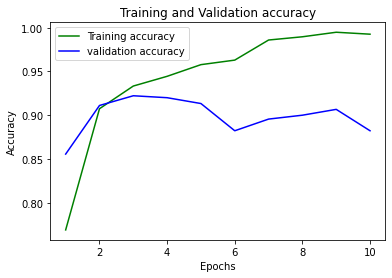

In [26]:
accu_train = history1.history['accuracy']
accu_val = history1.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accu_train, 'g', label='Training accuracy')
plt.plot(epochs, accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#prediction on test data
print("Evaluate on test data")
predict_result = model1.evaluate(test_images, test_labels, batch_size=32)
print("test loss, test acc:", predict_result)

Evaluate on test data
19/19 [==============================] - 4s 201ms/step - loss: 0.0317 - accuracy: 0.9867
test loss, test acc: [0.03173798322677612, 0.9866666793823242]


# MODEL 2

In [20]:
model2 = Sequential()

model2.add(Conv2D(64,(3,3), activation= 'relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(64,(3,3), activation= 'relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten())

model2.add(Dense(128,input_shape = train_images.shape[1:], activation='relu'))
model2.add(Dense(2,activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_images,train_labels, epochs= 15, validation_split= 0.25, batch_size= 32, callbacks=[tens_board])

Epoch 1/15
43/43 [==============================] - 72s 2s/step - loss: 1.8872 - accuracy: 0.7563 - val_loss: 0.4479 - val_accuracy: 0.9044
Epoch 2/15
43/43 [==============================] - 68s 2s/step - loss: 0.2743 - accuracy: 0.8978 - val_loss: 0.3648 - val_accuracy: 0.8933
Epoch 3/15
43/43 [==============================] - 67s 2s/step - loss: 0.2312 - accuracy: 0.9074 - val_loss: 0.3936 - val_accuracy: 0.8978
Epoch 4/15
43/43 [==============================] - 71s 2s/step - loss: 0.1901 - accuracy: 0.9230 - val_loss: 0.3162 - val_accuracy: 0.9022
Epoch 5/15
43/43 [==============================] - 69s 2s/step - loss: 0.1725 - accuracy: 0.9319 - val_loss: 0.3336 - val_accuracy: 0.8822
Epoch 6/15
43/43 [==============================] - 71s 2s/step - loss: 0.1079 - accuracy: 0.9600 - val_loss: 0.2759 - val_accuracy: 0.8911
Epoch 7/15
43/43 [==============================] - 69s 2s/step - loss: 0.0616 - accuracy: 0.9785 - val_loss: 0.2811 - val_accuracy: 0.8956
Epoch 8/15
43/43 [==

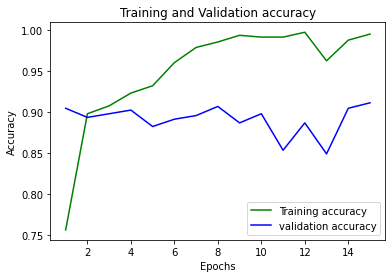

In [27]:
accu_train = history2.history['accuracy']
accu_val = history2.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, accu_train, 'g', label='Training accuracy')
plt.plot(epochs, accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
#prediction on test data
print("Evaluate on test data")
predict_result = model2.evaluate(test_images, test_labels, batch_size=32)
print("test loss, test acc:", predict_result)

Evaluate on test data
19/19 [==============================] - 4s 205ms/step - loss: 0.0581 - accuracy: 0.9867
test loss, test acc: [0.058057840913534164, 0.9866666793823242]


# MODEL 3

In [23]:
model3 = Sequential()

model3.add(Conv2D(64,(3,3), activation= 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))

model3.add(Conv2D(64,(3,3), activation= 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))

model3.add(Flatten())

model3.add(Dense(128,input_shape = train_images.shape[1:], activation='relu'))
model3.add(Dense(2,activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_images,train_labels, epochs= 15, validation_split= 0.25, batch_size= 32, callbacks=[tens_board])

Epoch 1/15
43/43 [==============================] - 72s 2s/step - loss: 2.9785 - accuracy: 0.8000 - val_loss: 5.0863 - val_accuracy: 0.6378
Epoch 2/15
43/43 [==============================] - 67s 2s/step - loss: 0.8422 - accuracy: 0.8852 - val_loss: 11.1908 - val_accuracy: 0.6133
Epoch 3/15
43/43 [==============================] - 68s 2s/step - loss: 0.4078 - accuracy: 0.9074 - val_loss: 16.0066 - val_accuracy: 0.6200
Epoch 4/15
43/43 [==============================] - 68s 2s/step - loss: 0.9153 - accuracy: 0.8889 - val_loss: 67.8704 - val_accuracy: 0.5178
Epoch 5/15
43/43 [==============================] - 67s 2s/step - loss: 0.5124 - accuracy: 0.9126 - val_loss: 28.3049 - val_accuracy: 0.5556
Epoch 6/15
43/43 [==============================] - 70s 2s/step - loss: 0.1798 - accuracy: 0.9319 - val_loss: 37.7004 - val_accuracy: 0.5333
Epoch 7/15
43/43 [==============================] - 68s 2s/step - loss: 0.1060 - accuracy: 0.9570 - val_loss: 32.9988 - val_accuracy: 0.5622
Epoch 8/15
43/

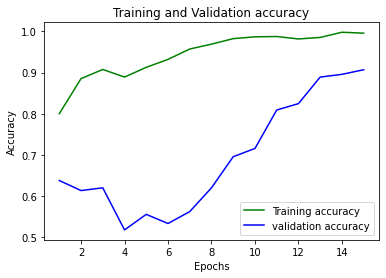

In [28]:
accu_train = history3.history['accuracy']
accu_val = history3.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, accu_train, 'g', label='Training accuracy')
plt.plot(epochs, accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
#prediction on test data
print("Evaluate on test data")
predict_result = model3.evaluate(test_images, test_labels, batch_size=32)
print("test loss, test acc:", predict_result)

Evaluate on test data
19/19 [==============================] - 6s 306ms/step - loss: 0.3302 - accuracy: 0.9783
test loss, test acc: [0.3302428424358368, 0.9783333539962769]


# MODEL 4

In [30]:
#Load VGG16 Model
from keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_images[0].shape)
base_model.trainable = False ## Not trainable weights
Vggmodel = Sequential()

Vggmodel.add(base_model)
Vggmodel.add(Flatten())
Vggmodel.add(Dense(50, input_shape = train_images.shape[1:], activation='relu'))
Vggmodel.add(Dense(20, activation='relu'))
Vggmodel.add(Dense(5, activation='softmax'))

Vggmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history4 = Vggmodel.fit(train_images, train_labels, epochs=10, validation_split=0.25, batch_size=32, callbacks=[tens_board])

Epoch 1/10
43/43 [==============================] - 168s 4s/step - loss: 0.3087 - accuracy: 0.8770 - val_loss: 0.1960 - val_accuracy: 0.9222
Epoch 2/10
43/43 [==============================] - 187s 4s/step - loss: 0.0840 - accuracy: 0.9689 - val_loss: 0.1448 - val_accuracy: 0.9356
Epoch 3/10
43/43 [==============================] - 189s 4s/step - loss: 0.0386 - accuracy: 0.9926 - val_loss: 0.1385 - val_accuracy: 0.9444
Epoch 4/10
43/43 [==============================] - 189s 4s/step - loss: 0.0243 - accuracy: 0.9956 - val_loss: 0.1341 - val_accuracy: 0.9467
Epoch 5/10
43/43 [==============================] - 173s 4s/step - loss: 0.0183 - accuracy: 0.9993 - val_loss: 0.1648 - val_accuracy: 0.9378
Epoch 6/10
43/43 [==============================] - 178s 4s/step - loss: 0.0108 - accuracy: 0.9985 - val_loss: 0.1532 - val_accuracy: 0.9444
Epoch 7/10
43/43 [==============================] - 168s 4s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1468 - val_accuracy: 0.9489
Epoch 8/10
43

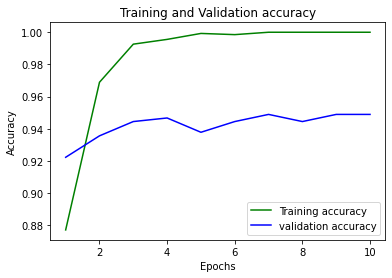

In [31]:
accu_train = history4.history['accuracy']
accu_val = history4.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accu_train, 'g', label='Training accuracy')
plt.plot(epochs, accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
#prediction on test data
print("Evaluate on test data")
Vgg_predict_result = Vggmodel.evaluate(test_images, test_labels, batch_size=32)
print("test loss, test acc:", Vgg_predict_result)

Evaluate on test data
19/19 [==============================] - 58s 3s/step - loss: 0.0319 - accuracy: 0.9900
test loss, test acc: [0.03190826252102852, 0.9900000095367432]
